In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power, det, solve
plt.rcParams['figure.figsize']=(20, 10)

# Statystyka - Zestaw 2
### Autor: Konrad Ulman

### Symulacja procesu Markova

- 2 użytkowników
- 1 komputer
- Macierz przejść:

\begin{equation*}
 P = 
    \begin{bmatrix}
    0.64 & 0.32 & 0.04 \\
    0.4 & 0.5 & 0.1 \\
    0.25  & 0.5  & 0.25 \\
    \end{bmatrix}
\end{equation*}

## Problem A

### Policzyć $ [P]^N $ dla dużych $ N $

In [2]:
P = np.matrix([[0.64, 0.32, 0.04],
              [0.4, 0.5, 0.1],
              [0.25, 0.5, 0.25]])

l = np.linspace(10, 1000, 10)
for i in l:
    print(f'Power: {i}')
    print(matrix_power(P, int(i)))

Power: 10.0
[[0.51020649 0.40816182 0.08163169]
 [0.51020227 0.40816435 0.08163338]
 [0.51019806 0.40816688 0.08163506]]
Power: 120.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 230.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 340.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 450.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 560.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 670.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 780.0
[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]
Power: 890.0
[[0.51020408

### Kryterium zbieżności $ |P^n - P^{n-1}| < 10^{-5} $

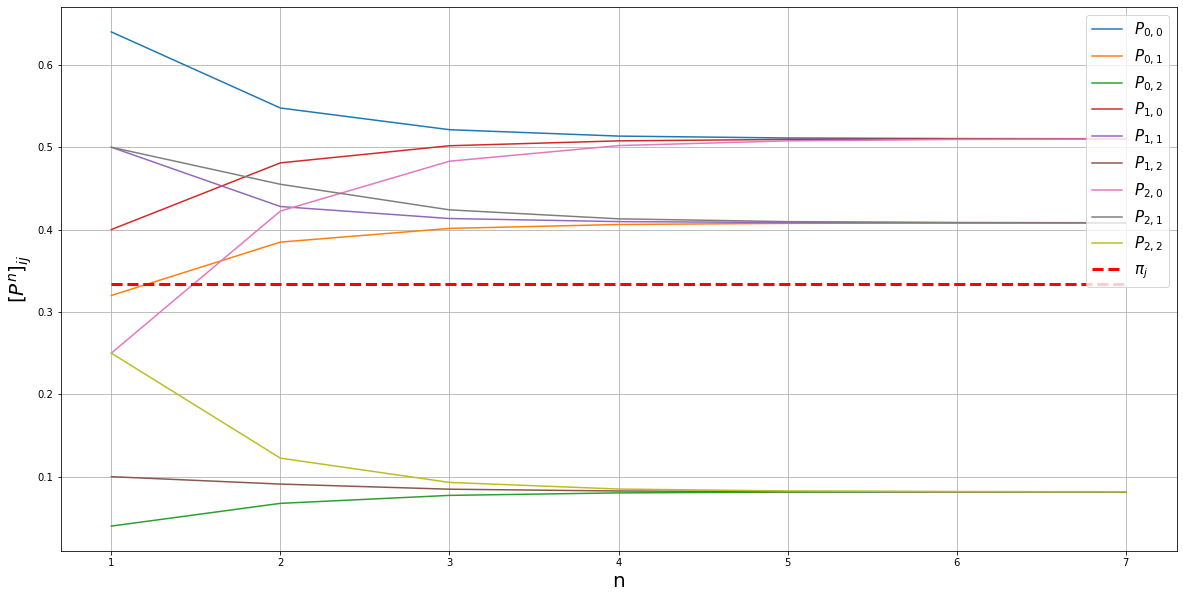

In [3]:
m_size = 3

y = [[[0.64], [0.32,], [0.04]],
    [[0.4], [0.5], [0.1]],
    [[0.25], [0.5], [0.25]]]

n = 2
while True:
    tn = matrix_power(P, n)
    for i in range(m_size):
        for j in range(m_size):
            y[i][j].append(tn[i, j])
    n += 1
    
    if np.abs(np.max(tn) - np.max(matrix_power(tn, n - 1))) < 10e-5:
        break


for i in range(m_size):
    for j in range(m_size):
        plt.plot(range(1, n), y[i][j], label='$P_{' + str(i) + ',' + str(j) + '}$')
        
        
avg = []
for i in range(n - 1):
    a = 0
    for r in range(m_size):
        for c in range(m_size):
            a += y[r][c][i]
    avg.append(a/m_size**2)
    

plt.plot(range(1, n), avg, linestyle='dashed', linewidth=3, color='r', label='$\pi_j$')

plt.legend(loc='upper right', prop={'size': 15})

plt.xlabel('n', fontsize=20)
plt.ylabel('$[P^n]_{ij}$', fontsize=20)
plt.grid()

plt.show()

## Problem B

- Start z wybranego węzła $ x = 0, 1, 2 $
- Losowanie kolejnego węzła zgodnie z $ P $
- Przejście do nowego węzła
- Losowanie $ \approx N = 10^4 $

In [4]:
N = 10**4

- Policzenie $ \pi_i^{\exp} = \dfrac{N_i}{N}, N_i $ - ile razy odwiedzone $ x=i $

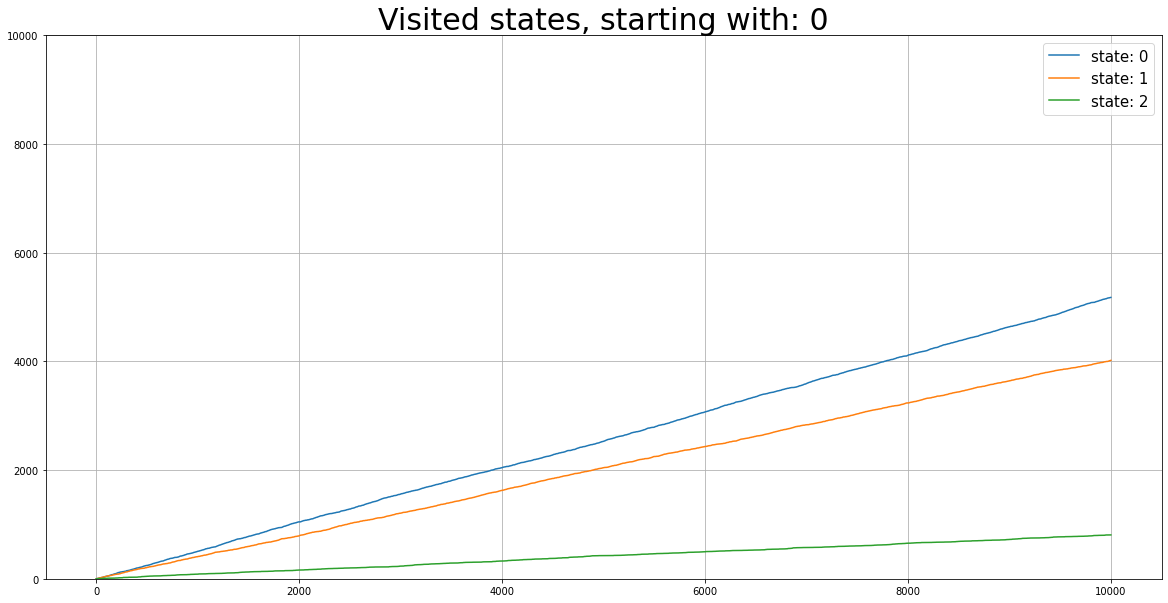

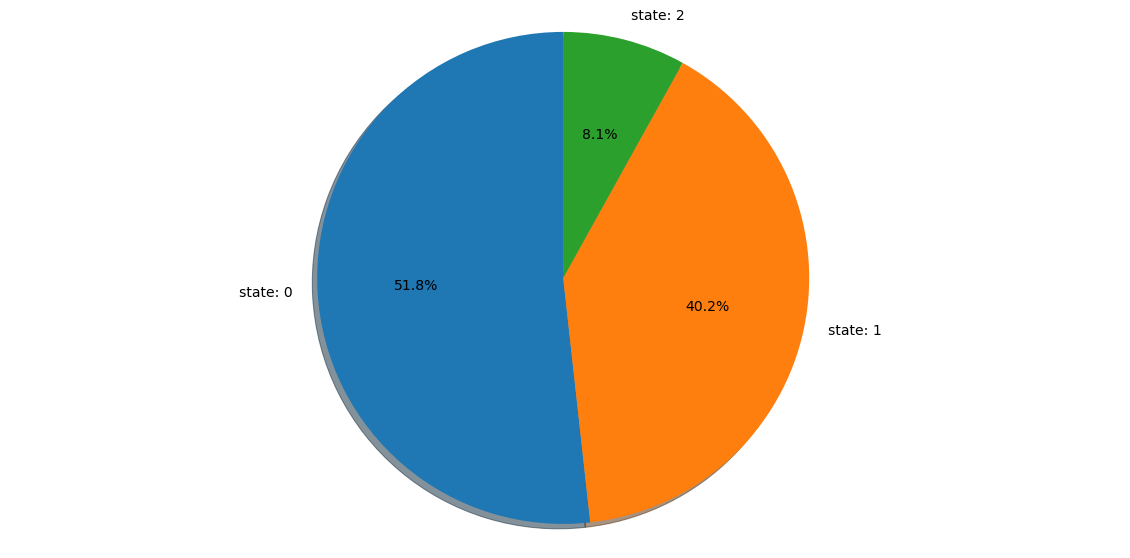

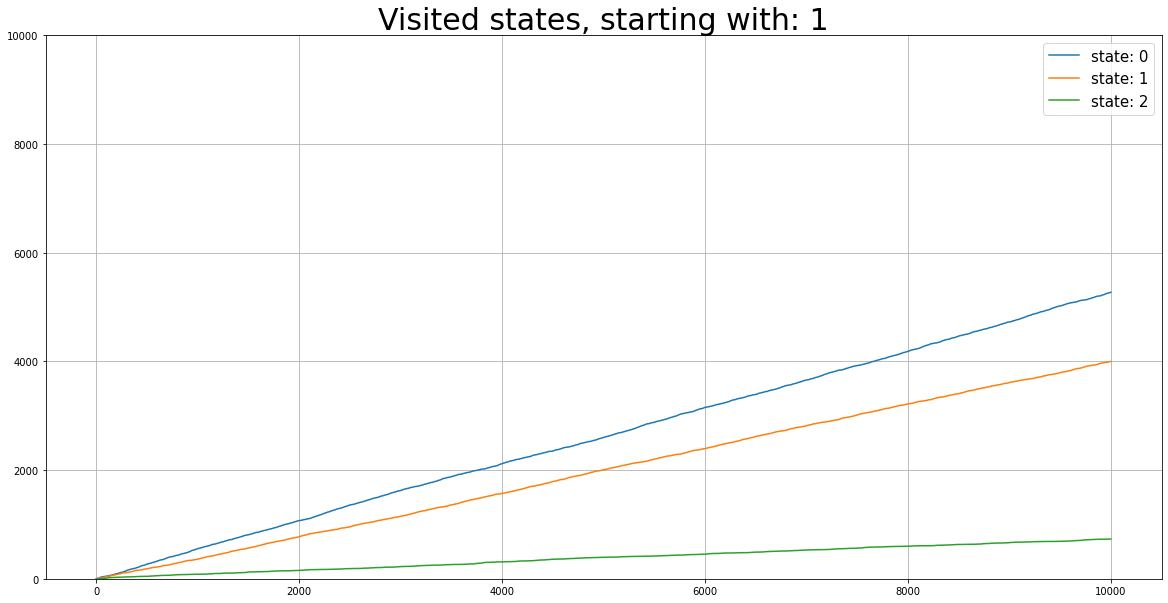

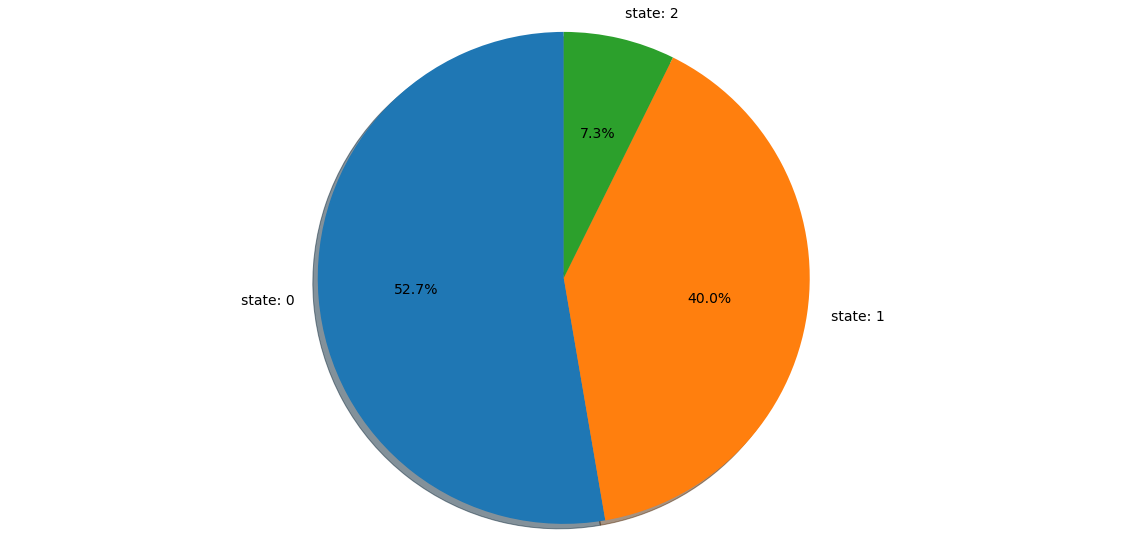

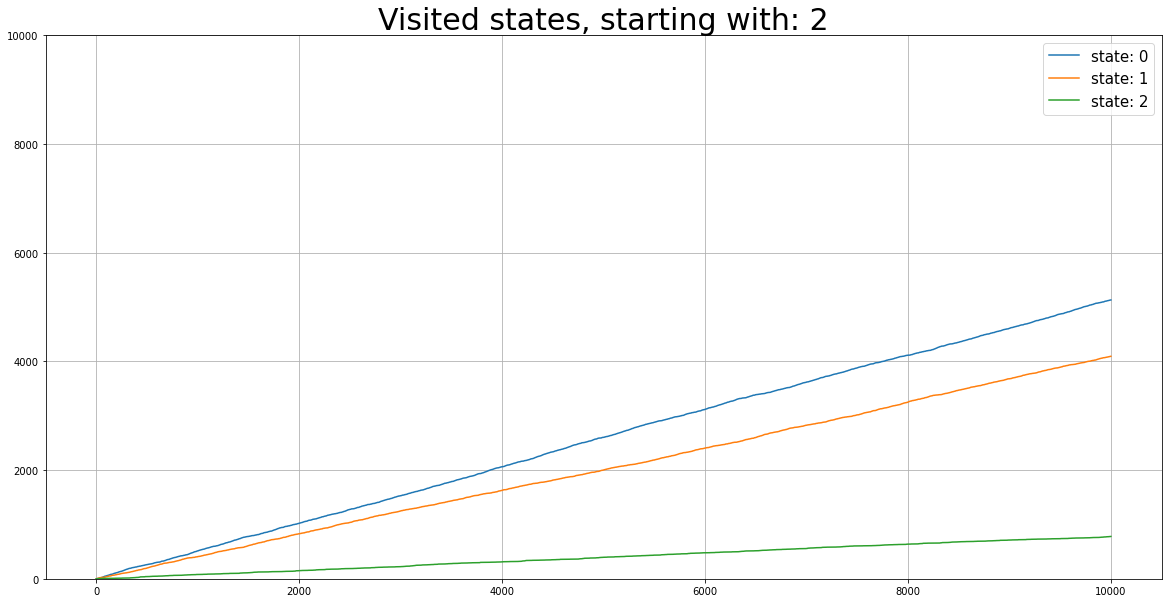

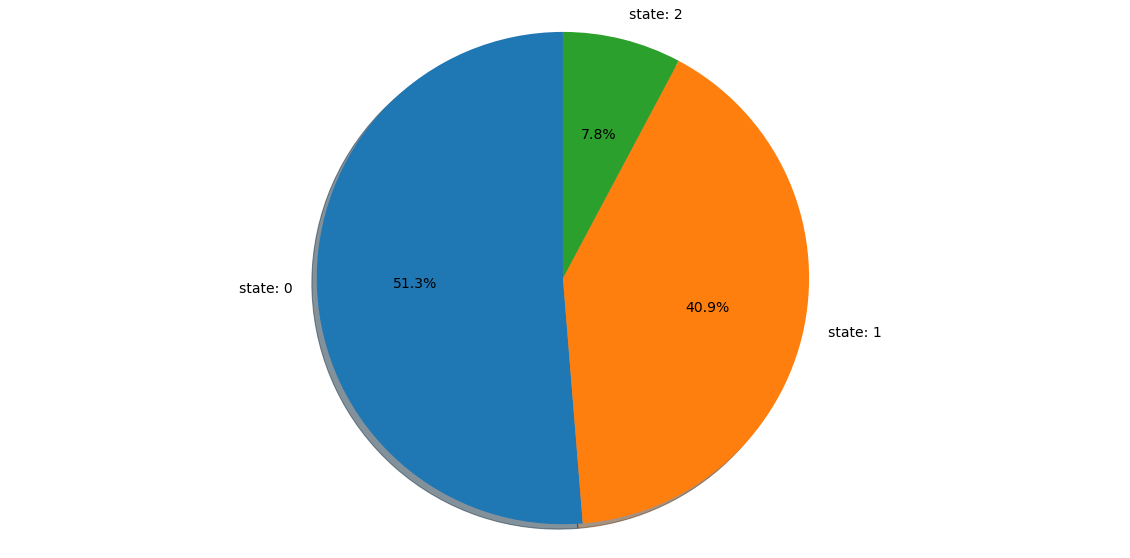

In [5]:
P = np.matrix([[0.64, 0.32, 0.04],
              [0.4, 0.5, 0.1],
              [0.25, 0.5, 0.25]])

states = [0, 1, 2]

def add_sum(state_l, i):
    for index, e in enumerate(state_l):
        if index == i:
            state_l[index].append(state_l[index][-1] + 1)
        else:
            state_l[index].append(state_l[index][-1])

def get_index(current_index, P):
    prob_total = 0.0
    index = 0
    r = np.random.uniform(0, 1)
    for p in P.getA()[current_index]:
        prob_total += p
        if r <= prob_total:
            return index
        index += 1
            
for s in states:
    current_node = s
    state_sum = [[0], [0], [0]]
    add_sum(state_sum, current_node)

    for i in range(N):
        new_index = get_index(current_node, P)
        add_sum(state_sum, new_index)
        current_node = new_index
    
    plt.rcParams['axes.titlesize']=30
    plt.title(f'Visited states, starting with: {s}')
    
    for i in states:
        plt.plot(range(N + 2), state_sum[i], label=f'state: {i}')
    plt.legend(loc='upper right', prop={'size': 15})
    plt.ylim(0, N)
    plt.grid()
    plt.show()
    
    fig1, axs = plt.subplots()
    labels = [ f'state: {i}' for i in states]
    sizes = [i[-1]/N for i in state_sum]
    axs.pie(sizes, labels=labels, textprops={'fontsize': 14}, autopct='%1.1f%%',
            shadow=True, startangle=90)
    axs.axis('equal')
    plt.show()


### Porównanie z $ [P]^N, $ start z $ x = 0, 1, 2 $,  zbieżność

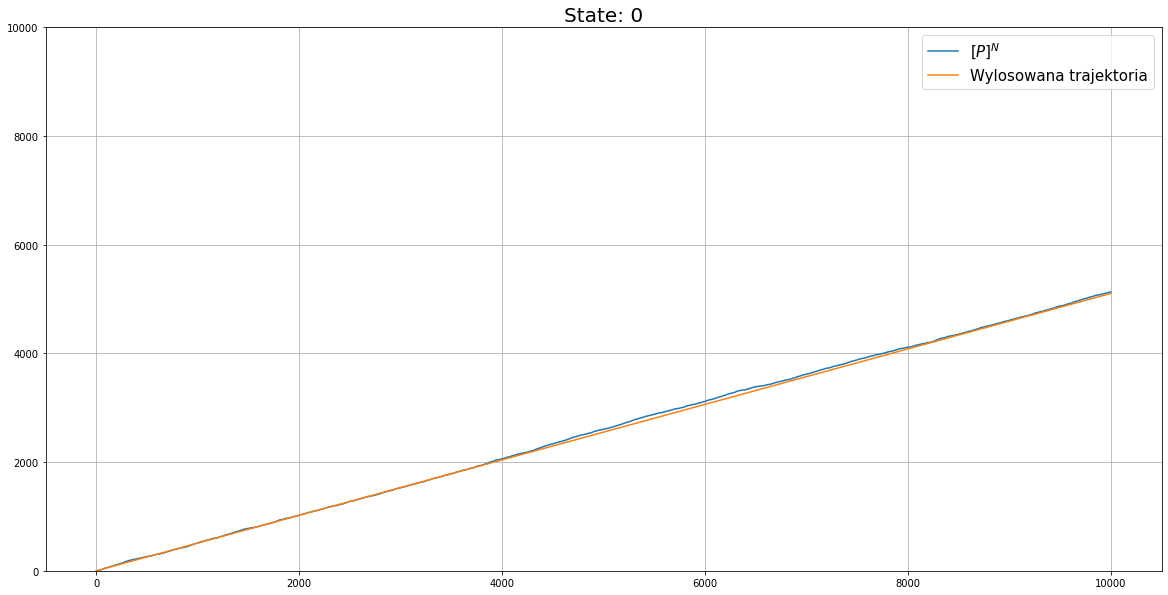

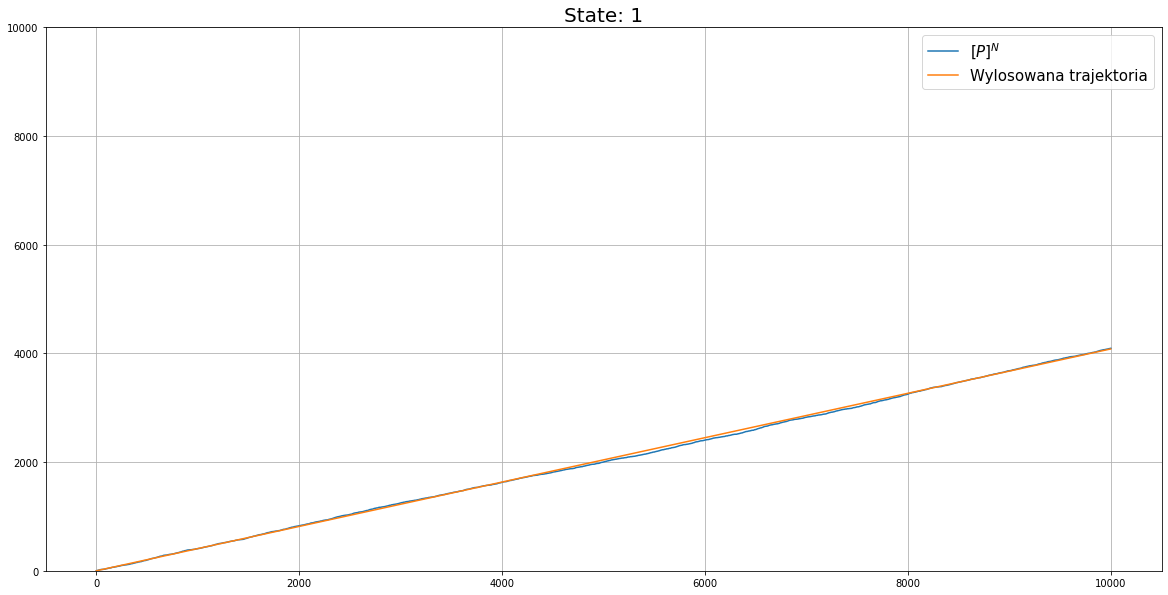

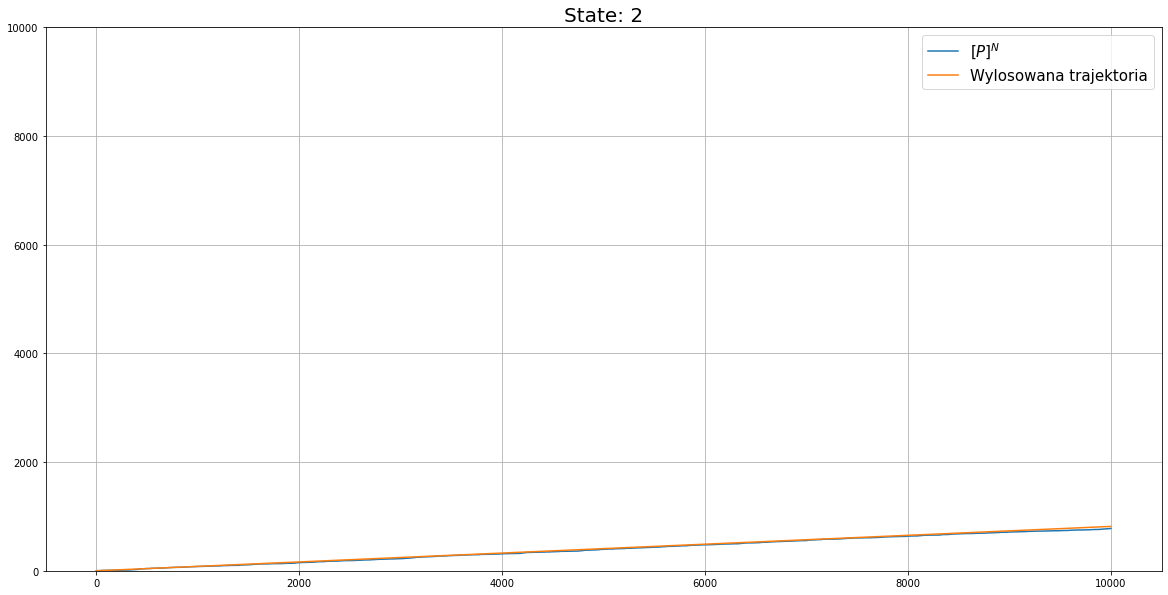

In [6]:
P = np.matrix([[0.64, 0.32, 0.04],
              [0.4, 0.5, 0.1],
              [0.25, 0.5, 0.25]])

tn = matrix_power(P, 10)
plt.rcParams['axes.titlesize']=20
state_arr = [[], [], []]

for s in states:
    for i in range(N):
        state_arr[s].append(tn[0, s] * i)
        
    plt.plot(range(N + 2), state_sum[s], label=f'$[P]^N$')
    plt.plot(range(N), state_arr[s], label=f'Wylosowana trajektoria')

    plt.title(f'State: {s}')
    plt.ylim(0, N)
    plt.grid()
    plt.legend(loc='upper right', prop={'size': 15})
    plt.show()

## Problem C

- 100 użytkowników
- $ x = 0, 1, 2, ..., 100 $
- $ P_{logowania} = 0.2, P_{wylogowania} = 0.5 $ tak jak poprzednio
- Trudno jest skonstruować macierz prawdopodobieństwa
- Wykonujemy symulację trajektorii
- Ile wynosi $ \Pi^{\exp} $ dla $ i = 0, 1, ..., 100 $
- Wykresy zbieżności
    


In [14]:
def create_avg_result(results, num_of_experiments, num_of_simulations):
    result = []
    for i in range(num_of_experiments):
        avg = 0
        for a in range(num_of_simulations):
            avg += r[a][i]

        result.append(avg/num_of_simulations)
    return result

def plot_avg(result, num_of_experiments):
    sum_avg = sum(result)/len(result)

    plt.plot(result)
    plt.plot([sum_avg for i in range(num_of_experiments)], linestyle='dashed', linewidth=3, color='r', label=f'avg: {round(sum_avg, 2)}')
    
    plt.rcParams['axes.titlesize']=10
    plt.title('User distribution')
    plt.ylabel('Number of logged in users')
    plt.legend(loc='upper right', prop={'size': 15})
    
    plt.show()
    
def plot_trajectory(result, num_of_experiments, num_of_states, n = 5):
    for s in np.arange(0, num_of_states, n):
        trajectory = []
        state_sum = 0
        for n in range(len(result)):
            if int(result[n]) == s:
                state_sum += 1
            trajectory.append(state_sum)
        plt.plot(trajectory, label=f'state {s}')
    
    plt.title('State trajectory')
    plt.xlabel('n')
    plt.legend(loc='upper right', prop={'size': 15})
    
    plt.show()


def create_and_plot_distribution(p_in, p_out, num_of_simulations, num_of_experiments, num_of_states):
    users_states = [False for i in range(num_of_states)]
    result = [[None] for i in range(num_of_simulations)]
    
    for s in range(num_of_simulations):
        users = []
        for i in range(num_of_experiments):
            logged_users = 0
            for index, val in enumerate(users_states):
                rand_val = np.random.uniform()
                if val == False:
                    if rand_val < p_in:
                        users_states[index] = True
                        logged_users += 1
                if val == True:
                    if rand_val < p_out:
                        users_states[index] = False
                    else:
                        logged_users += 1
            users.append(logged_users)
        result[s] = users 
        
        y, binEdges,_ = plt.hist(users, histtype=u'step')
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
        plt.plot(bincenters,y,'-')

    plt.xlim(0, num_of_states)
    plt.grid()
    plt.xlabel('Number of logged in users')
    plt.show()
    
    return result 

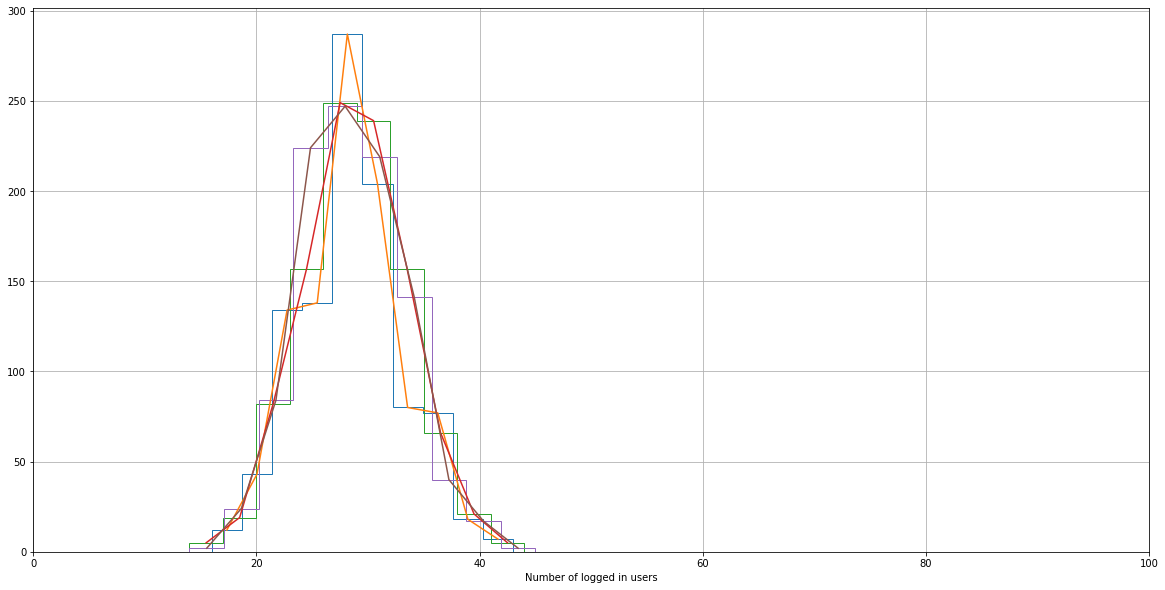

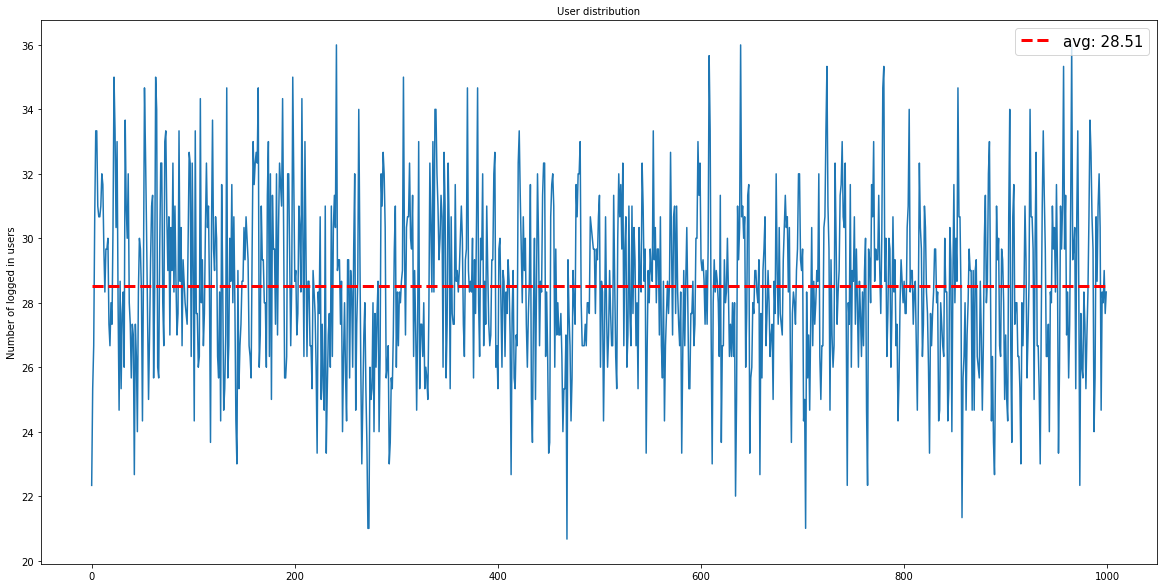

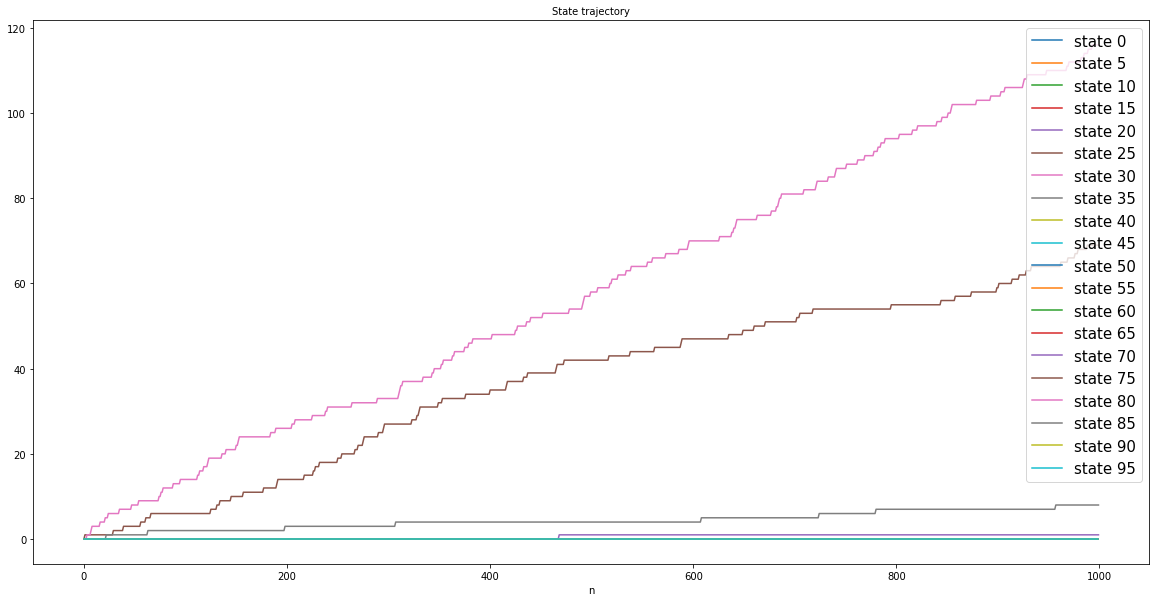

In [15]:
num_of_simulations = 3
num_of_experiments = 1000
num_of_states = 100

r = create_and_plot_distribution(0.2, 0.5, num_of_simulations, num_of_experiments, num_of_states)

result = create_avg_result(r, num_of_experiments, num_of_simulations)

plot_avg(result, num_of_experiments)
plot_trajectory(result, num_of_experiments, num_of_states)

## Problem D

- 100 użytkowników
- $ x = 0, 1, 2, ..., 100 $

### Dla wylogowanych:

- $ P_{logowania} = 0.2 $
- $ P_{pozostanie \, niezalogowanym} = 0.8 $ 

### Dla zalogowanych:

- $ P_{wylogowania} = 1 - (0.008 * x + 0.1) $
- $ P_{pozostanie \, zalogowanym} = 0.008 * x + 0.1 $


In [16]:
def create_and_plot_distribution(p_in, num_of_simulations, num_of_experiments, num_of_states):
    users_states = [False for i in range(num_of_states)]
    result = [[None] for i in range(num_of_simulations)]
    
    for s in range(num_of_simulations):
        users = []
        logged_users = 0
        
        for i in range(num_of_experiments):
            p_out = 1 - (0.008 * logged_users + 0.1)
            logged_users = 0
            for index, val in enumerate(users_states):
                rand_val = np.random.uniform()
                if val == False:
                    if rand_val < p_in:
                        users_states[index] = True
                        logged_users += 1
                if val == True:
                    if rand_val < p_out:
                        users_states[index] = False
                    else:
                        logged_users += 1
            users.append(logged_users)
        result[s] = users 

        y, binEdges,_ = plt.hist(users, histtype=u'step')
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
        plt.plot(bincenters,y,'-')

    plt.xlim(0, num_of_states)
    plt.grid()
    plt.xlabel('Number of logged in users')
    plt.show()
    
    return result

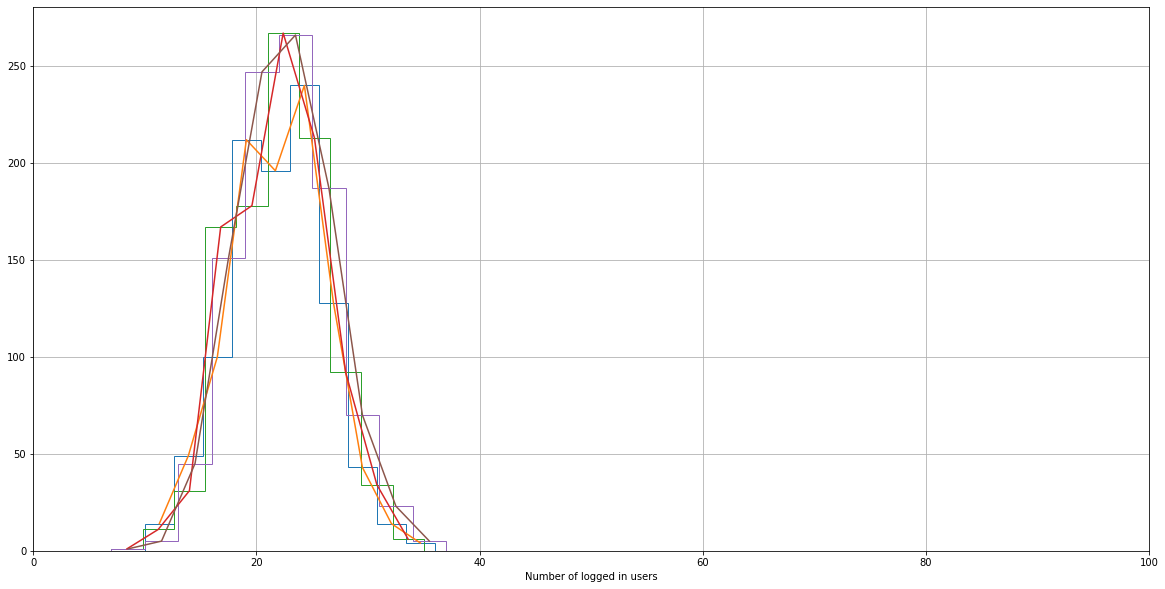

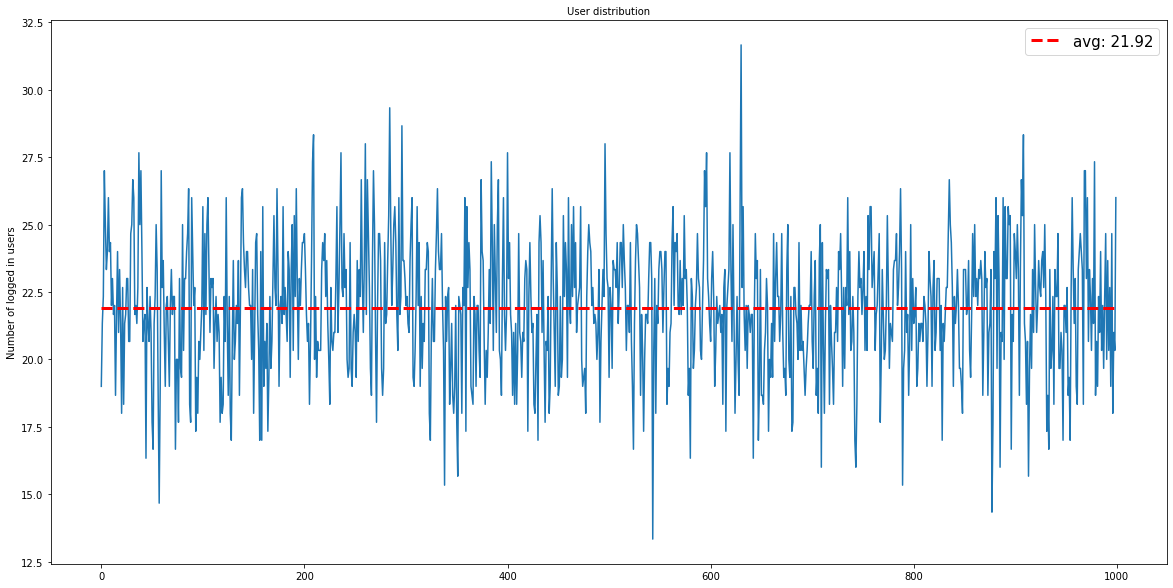

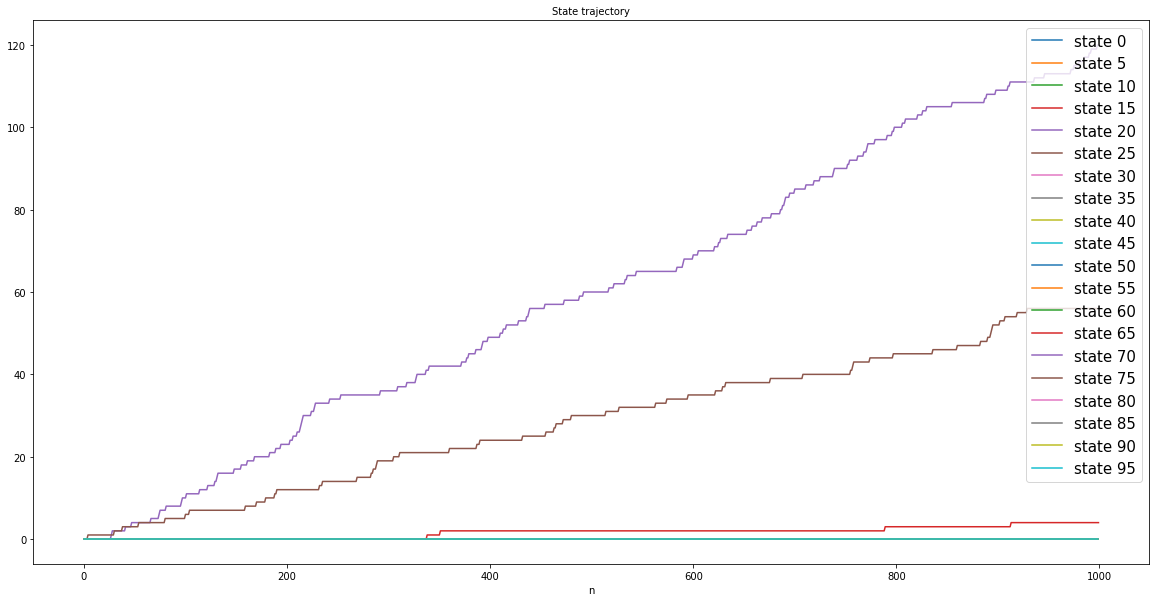

In [17]:
num_of_simulations = 3
num_of_experiments = 1000
num_of_states = 100

r = create_and_plot_distribution(0.2, num_of_simulations, num_of_experiments, num_of_states)

result = create_avg_result(r, num_of_experiments, num_of_simulations)

plot_avg(result, num_of_experiments)
plot_trajectory(result, num_of_experiments, num_of_states)